In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
urllib.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')

('olympic100m.txt', <httplib.HTTPMessage instance at 0x000000000634B448>)

In [3]:
data = np.loadtxt("olympic100m.txt", delimiter=",")
x = data[:, 0]
t = data[:, 1]

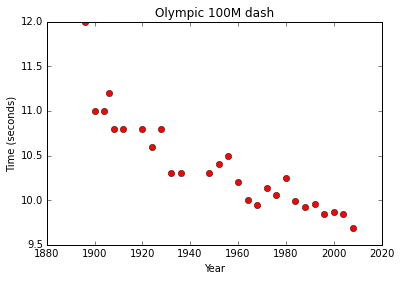

In [4]:
plt.plot(x, t, "ro");
plt.xlabel("Year")
plt.ylabel("Time (seconds)")
plt.title("Olympic 100M dash")

In [7]:
xbar = np.mean(x)
tbar = np.mean(t)
xxbar = np.mean(np.multiply(x, x))
xtbar = np.mean(np.multiply(x, t))
print "Mean of x:", xbar
print "Mean of t:", tbar
print "Mean of xx:", xxbar
print "Mean of xt:", xtbar

Mean of x: 1952.37037037
Mean of t: 10.3896296296
Mean of xx: 3812975.55556
Mean of xt: 20268.0681481


In [8]:
w1 = (xtbar - xbar*tbar) /(xxbar - xbar**2)
w0 = tbar - w1*xbar
print w0
print w1

36.4164559025
-0.013330885711


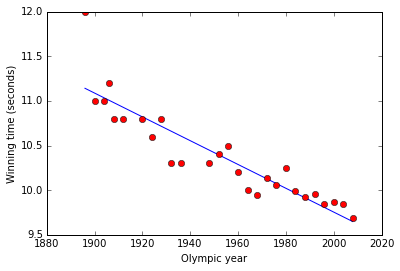

In [10]:
xtest = np.linspace(1896, 2008, 100)[:, None]
ftest = w0 + w1*xtest
plt.plot(xtest, ftest);
plt.plot(x, t, "ro");
plt.xlabel("Olympic year");
plt.ylabel("Winning time (seconds)");

In [11]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
x = x.reshape((27, 1))
t = t.reshape((27, 1))
reg.fit(x, t)
print "Coefficient:", reg.coef_[0][0]
print "Intercept:", reg.intercept_[0]
print "Variance explained:", reg.score(x, t)

 Coefficient: -0.013330885711
Intercept: 36.4164559025
Variance explained: 0.812351636688


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


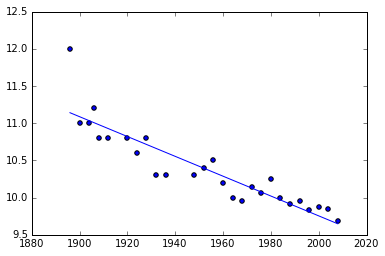

In [19]:
plt.plot(x, reg.predict(x));
plt.scatter(x, t);

In [8]:
X = np.hstack((np.ones_like(x), x, x**2))

In [56]:
XX = np.dot(X.T, X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, t)
w = np.dot(invXX, Xt)
print w

[[  4.55597857e+02]
 [ -4.43160486e-01]
 [  1.10151552e-04]]


In [62]:
testx = np.linspace(1896, 2012, 100)[:, None]
testX = np.hstack((np.ones_like(testx), testx, testx**2))
testt = np.dot(testX, w)

In [9]:
polyreg = LinearRegression()
polyreg.fit(X, t)
print "Coefficients:", polyreg.coef_
print "Intercept:", polyreg.intercept_
print "Variance explained:", polyreg.score(X, t)

Coefficients: [[  0.00000000e+00  -4.43160486e-01   1.10151552e-04]]
Intercept: [ 455.59785603]
Variance explained: 0.858412477235


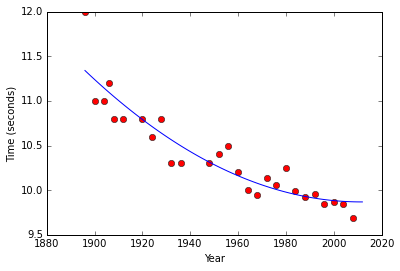

In [64]:
plt.figure()
plt.plot(x, t, "ro")
plt.plot(testx, testt, "b")
plt.xlabel("Year")
plt.ylabel("Time (seconds)")

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [94]:
x = (x - 1896) / 4
losses = []
for deg in range(1, 11):
    deg_lv = []
    X = np.ones_like(x)
    for i in range(1, deg + 1):
        X = np.hstack((X, x**i))
    for i in range(len(x)):
        X_ = np.ma.array(X, mask=False)
        T_ = np.ma.array(X, mask=False)
        X_.mask[i], T_.mask[i] = True, True
        w = np.linalg.solve(np.dot(X_.T, X_), np.dot(X_.T, t))
        preds = np.dot(X, w)
        deg_lv.append(mean_squared_error(t, preds))
    losses.append(np.mean(deg_lv))
print losses

[277.69408717450267, 277.69429036284231, 277.69447950511847, 277.69441898686262, 277.69927969590196, 277.695709196743, 277.69526680242814, 277.69528254090397, 277.69511627229173, 277.69579131975468]


masked_array(data =
 [[ -7.57165527]
 [ -0.4143859 ]
 [  6.74285817]
 [ 13.90007694]
 [ 21.05727042]
 [ 28.21443859]
 [ 35.37158148]
 [ 42.52869907]
 [ 49.68579136]
 [ 56.84285835]],
             mask =
 False,
       fill_value = 1e+20)

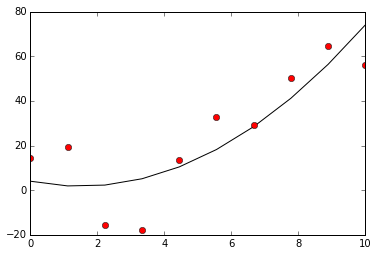

In [81]:
x = np.linspace(0, 10, 10)[:, None]
y = x**2 - 3*x + 4
t = y + np.random.normal(0, 10, (x.size, 1)) #add noise to y
plt.plot(x, y, "k")
plt.plot(x, t, "ro")

In [82]:
maxorder = 5
xtest = np.linspace(0, 10, 30)[:, None]
X = np.ones_like(x)
Xtest = np.ones_like(xtest)
for i in range(1, maxorder + 1):
    X = np.hstack((X, x**i))
    Xtest = np.hstack((Xtest, xtest**i))

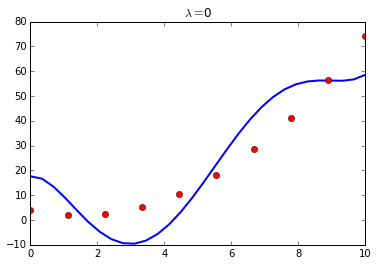

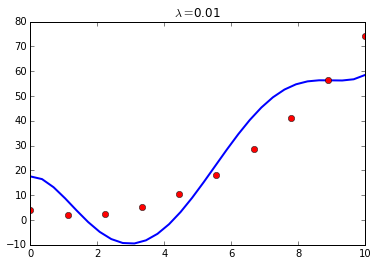

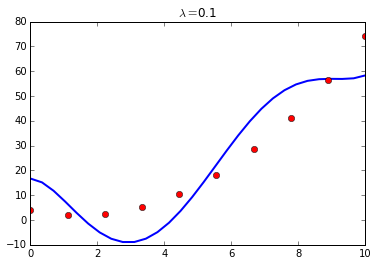

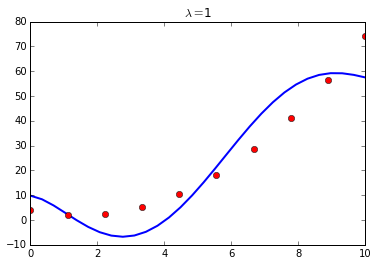

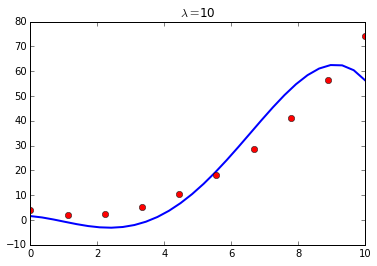

In [88]:
for lamb in [0.0, 0.01, 0.1, 1.0, 10.0]:
    #solve for coefficients
    w = np.dot(np.linalg.inv(np.dot(X.T, X) + lamb*np.identity(maxorder + 1)), np.dot(X.T, t))
    ftest = np.dot(Xtest, w) #test values using coefficients
    plt.figure()
    plt.plot(xtest, ftest, "b-", linewidth = 2)
    plt.plot(x, y, "ro")
    plt.title("$\lambda=$%g"%lamb)